## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from dython.nominal import associations
from dython.nominal import identify_nominal_columns

## Load dataset

In [2]:
pd.options.display.max_columns = None

In [3]:
raw = pd.read_csv('hotel_bookings_data.csv')
raw.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
0,Resort Hotel,0,342,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,3,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
1,Resort Hotel,0,737,2017,September,27,1,0,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,4,No Deposit,NaN,NaN,0,Personal,0.0,0,0,Check-Out
2,Resort Hotel,0,7,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,75.0,0,0,Check-Out
3,Resort Hotel,0,13,2017,September,27,1,0,1,1,0.0,0,Breakfast,Kabupaten Bangka,Corporate,Corporate,0,0,0,0,No Deposit,304.0,NaN,0,Personal,75.0,0,0,Check-Out
4,Resort Hotel,0,14,2017,September,27,1,0,2,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,98.0,0,1,Check-Out


## Data Understanding

In [4]:
raw.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2018.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2018.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2018.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2019.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2019.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


In [5]:
raw.describe(include=object)

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [6]:
cat = raw.describe(include=object).columns

In [7]:
raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

## Data Preprocessing

### Missing Values

In [8]:
df_mv = raw.copy()

In [9]:
df_mv.isna().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_weekdays_nights               0
adults                                 0
children                               4
babies                                 0
meal                                   0
city                                 488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
booking_changes                        0
deposit_type                           0
agent                              16340
company                           112593
days_in_waiting_list                   0
customer_type   

Data with null values: `children`, `city`, `agent` dan `company`

Asumsi definisi fitur dan pengisian missing value:
- `children` adalah jumlah anak yang dibawa, missing value diisi dengan modus
- `city` adalah kota asal, missing value diisi dengan modus
- `agent` adalah ID dari agency booking, missing value diisi dengan nilai 0 artinya pemesanan tanpa agency
- `company` adalah ID dari company, missing value diisi dengan nilai 0 artinya pemesanan bukan dari perusahaan melainkan pribadi

In [10]:
for i in ['children','city']:
    df_mv[i] = df_mv[i].fillna(df_mv[i].mode()[0])
for i in ['agent','company']:
    df_mv[i] = df_mv[i].fillna(0)

In [11]:
df_mv.isna().sum() #cek kembali data

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_weekdays_nights          0
adults                            0
children                          0
babies                            0
meal                              0
city                              0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
deposit_type                      0
agent                             0
company                           0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

### Wrong Value

In [12]:
df_wv = df_mv.copy()

In [13]:
for i in cat:
    print(df_wv[i].value_counts())

City Hotel      79330
Resort Hotel    40060
Name: hotel, dtype: int64
October      13877
September    12661
July         11791
December     11160
June         11089
August       10939
November     10508
May           9794
April         8068
January       6794
February      6780
March         5929
Name: arrival_date_month, dtype: int64
Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64
Kota Denpasar              49078
Kabupaten Bangka           12129
Kota Yogyakarta            10415
Kota Batu                   8568
Kabupaten Bandung           7287
                           ...  
Kabupaten Malang               1
Kabupaten Bekasi               1
Kabupaten Barito Kuala         1
Kota Palembang                 1
Kabupaten Maluku Tengah        1
Name: city, Length: 177, dtype: int64
Online TA        56477
Offline TA/TO    24219
Groups           19811
Direct           12606
Corporate         5295
Complementary      743

Pada kolom `meal` terdapat value `Undefined`, diasumsikan bahwa `undefined` berarti ketika customer melakukan reservasi tidak melakukan pemilihan paket makanan baik `Breakfast`, `Dinner`, `Full Board`, maupun `No Meal`, artinya customer tidak melakukan reservasi untuk makanan. Karena itu dapat dikatakan `undefined` sama dengan `No Meal`, berarti semua value `undefined` dapat kita ubah menjadi `No Meal` 

In [96]:
df_wv.loc[df_wv['meal']=='Undefined','meal'] = 'No Meal'

In [97]:
df_wv['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

### Unnecessary Feature

In [111]:
df_wv.shape

(119390, 29)

In [112]:
df_uf = df_wv.copy()
df_uf['total_guest'] = df_uf['adults'] + df_uf['children'] + df_uf['babies']
df_uf.drop(df_uf[df_uf['total_guest']==0].index, inplace=True)
df_uf.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,total_guest
25399,Resort Hotel,0,100,2018,August,26,19,2,5,2,0.0,0,Dinner,Kabupaten Bangka,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,243.0,0.0,0,Contract,90.90,0,0,Check-Out,2.0
111439,City Hotel,0,10,2019,July,19,7,2,2,2,0.0,0,Breakfast,Kabupaten Garut,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,27.0,0.0,0,Personal,108.90,0,0,Check-Out,2.0
29963,Resort Hotel,0,28,2018,January,46,8,0,3,2,0.0,0,Breakfast,Kabupaten Kepulauan Seribu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,41.40,0,1,Check-Out,2.0
31423,Resort Hotel,0,1,2018,February,53,27,0,1,1,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,196.0,0.0,0,Personal,59.20,0,0,Check-Out,1.0
116864,City Hotel,0,3,2019,September,30,23,2,1,2,0.0,0,No Meal,Kabupaten Bandung,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,158.67,0,1,Check-Out,2.0


In [114]:
df_uf.shape

(119210, 30)

## Data Analysis

In [99]:
df_da = df_uf.copy()
df_da.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
885,Resort Hotel,1,81,2017,October,32,3,1,3,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,8.0,0.0,0,Contract,123.0,0,0,Canceled
74610,City Hotel,1,360,2017,December,42,12,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,1,0,0,Non Refund,1.0,0.0,0,Contract,62.0,0,0,Canceled
35024,Resort Hotel,0,1,2019,June,15,10,1,0,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,90.0,0,1,Check-Out
106136,City Hotel,0,2,2019,April,7,18,2,2,2,0.0,0,No Meal,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,7.0,0.0,0,Personal,59.4,0,0,Check-Out
105279,City Hotel,0,7,2019,April,5,3,0,1,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,1,No Deposit,14.0,0.0,0,Personal,98.0,0,0,Check-Out


In [16]:
month_order = ['January','February','March','April','May','June','July','August','September','October','November','December']

In [17]:
month_map = {
    'January'  : 1,
    'February' : 2,
    'March'    : 3,
    'April'    : 4,
    'May'      : 5,
    'June'     : 6,
    'July'     : 7,
    'August'   : 8,
    'September': 9,
    'October'  : 10,
    'November' : 11,
    'December' : 12    
}

In [18]:
res_month = df_da.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'reservation_status':'count'}).reset_index()
res_month.columns = ['hotel','arrival_date_year','arrival_date_month','reservation']
res_month['arrival_date_month'] = res_month['arrival_date_month'].map(month_map) 
res_month = res_month.groupby(['hotel','arrival_date_month']).agg({'reservation':'mean'}).reset_index()
res_month.columns = ['hotel','arrival_date_month','monthly_average']
res_month

,hotel,arrival_date_month,monthly_average
0,City Hotel,1,2178.500000
1,City Hotel,2,2066.000000
2,City Hotel,3,1868.000000
3,City Hotel,4,2482.500000
4,City Hotel,5,3229.000000
5,City Hotel,6,3740.000000
6,City Hotel,7,4116.000000
7,City Hotel,8,3947.000000
8,City Hotel,9,2696.000000
9,City Hotel,10,2994.333333


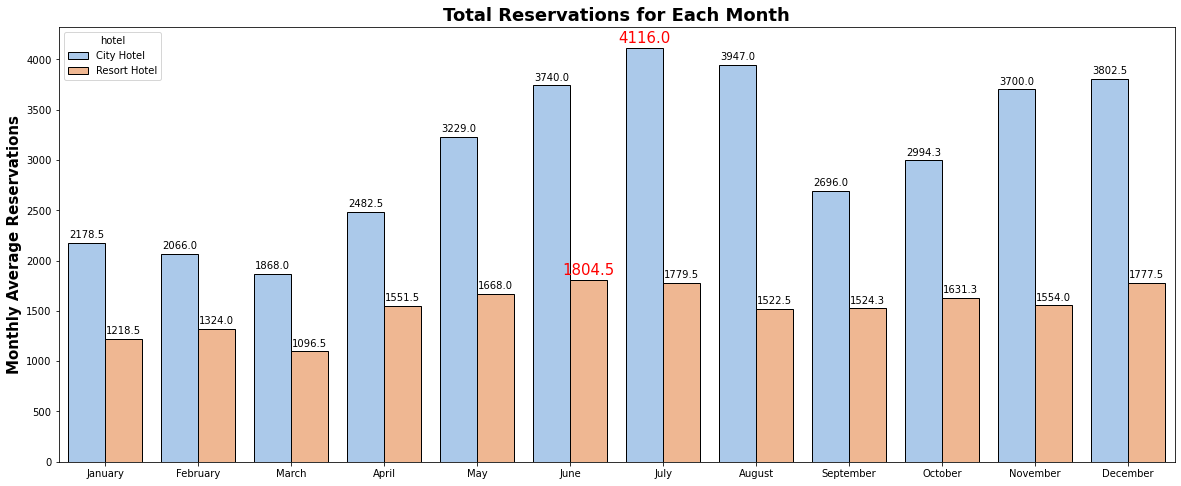

In [19]:
plt.figure(figsize=(20,8))
sns.barplot(data = res_month, x='arrival_date_month',y='monthly_average', hue='hotel', palette='pastel', edgecolor='black')
plt.title('Total Reservations for Each Month', size=18, weight='bold')
plt.ylabel('Monthly Average Reservations', size=15, weight='bold')
plt.xlabel('')
for i in range (0,12):
    if res_month['monthly_average'][i] == res_month.iloc[0:12,2].max():
        plt.text(res_month['arrival_date_month'][i]-1-0.2, res_month['monthly_average'][i] + 50, round(res_month['monthly_average'][i],1), ha='center', size = 15, color='red')
    else:
        plt.text(res_month['arrival_date_month'][i]-1-0.2, res_month['monthly_average'][i] + 50, round(res_month['monthly_average'][i],1), ha='center', weight='light')
for i in range (12,24):
    if res_month['monthly_average'][i] == res_month.iloc[13:23,2].max():
        plt.text(res_month['arrival_date_month'][i]-1+0.2, res_month['monthly_average'][i] + 50, round(res_month['monthly_average'][i],1), ha='center', size = 15, color='red')
    else:
        plt.text(res_month['arrival_date_month'][i]-1+0.2, res_month['monthly_average'][i] + 50, round(res_month['monthly_average'][i],1), ha='center', weight='light')
plt.xticks(range(0,12),month_order);

Insight:
- Reservasi City Hotel mengalami penurunan di bulan Januari-April. Hal ini bisa terjadi karena bulan tersebut awal masuk baik sekolah maupun perkuliahan sehingga tidak banyak libur. Sedangkan di bulan Juni-Desember banyak reservasi karena banyak libur seperti libur semester genap sekolah/perkuliahan, libur natal, dll
- Reservasi Resort Hotel rendah di bulan Januar-Maret, mengalami kenaikan reservasi di bulan September-Oktober.
- Menariknya puncak reservasi kedua tipe hotel terjadi di bulan Oktober walaupun di bulan tersebut tidak ada libur panjang, ada kemungkinan reservasi yang dilakukan di bulan ini bukan reservasi yang dilakukan untuk sekadar liburan.

In [20]:
df_da['customer_type'].value_counts()

Personal     89613
Family       25124
Contract      4076
Bussiness      577
Name: customer_type, dtype: int64

In [21]:
df_da['is_canceled'].value_counts()

0    75166
1    44224
Name: is_canceled, dtype: int64

In [22]:
df_da_no_cancel = df_da.copy()
df_da_no_cancel = df_da_no_cancel[df_da_no_cancel['is_canceled']==0]

In [92]:
res_month_no_cancel = df_da_no_cancel.groupby(['hotel','arrival_date_year','arrival_date_month']).agg({'reservation_status':'count'}).reset_index()
res_month_no_cancel.columns = ['hotel','arrival_date_year','arrival_date_month','monthly_reservation']
res_month_no_cancel['arrival_date_month'] = res_month_no_cancel['arrival_date_month'].map(month_map)
res_month_no_cancel = res_month_no_cancel.groupby(['hotel','arrival_date_month']).agg({'monthly_reservation':'mean'}).reset_index()
res_month_no_cancel.columns = ['hotel','arrival_date_month','reservation']
res_month_no_cancel['reservation'] = round(res_month_no_cancel['reservation'],2)
res_month_no_cancel

,hotel,arrival_date_month,reservation
0,City Hotel,1,1348.00
1,City Hotel,2,1196.00
2,City Hotel,3,1127.00
3,City Hotel,4,1532.00
4,City Hotel,5,2036.00
5,City Hotel,6,2007.50
6,City Hotel,7,2289.50
7,City Hotel,8,2183.00
8,City Hotel,9,1594.00
9,City Hotel,10,1793.67


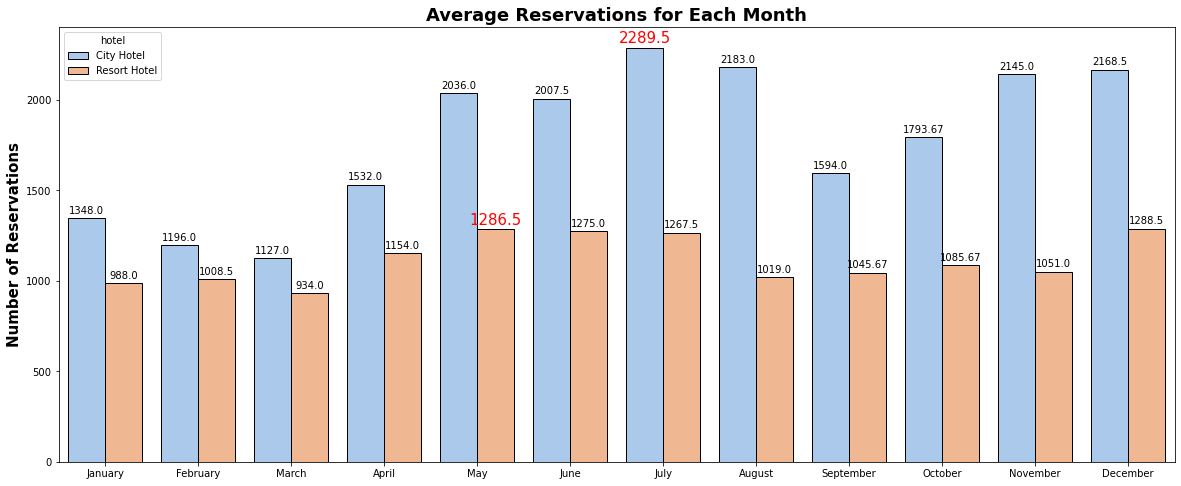

In [94]:
plt.figure(figsize=(20,8))
sns.barplot(data = res_month_no_cancel, x='arrival_date_month',y='reservation', hue='hotel', palette='pastel', edgecolor='black')
plt.title('Average Reservations for Each Month', size=18, weight='bold')
plt.ylabel('Number of Reservations', size=15, weight='bold')
plt.xlabel('')
for i in range (0,12):
    if res_month_no_cancel['reservation'][i] == res_month_no_cancel.iloc[0:12,2].max():
        plt.text(res_month_no_cancel['arrival_date_month'][i]-1-0.2, res_month_no_cancel['reservation'][i] + 25, res_month_no_cancel['reservation'][i], ha='center', size = 15, color='red')
    else:
        plt.text(res_month_no_cancel['arrival_date_month'][i]-1-0.2, res_month_no_cancel['reservation'][i] + 25, res_month_no_cancel['reservation'][i], ha='center', weight='light')
for i in range (12,24):
    if res_month_no_cancel['reservation'][i] == res_month_no_cancel.iloc[13:23,2].max():
        plt.text(res_month_no_cancel['arrival_date_month'][i]-1+0.2, res_month_no_cancel['reservation'][i] + 25, res_month_no_cancel['reservation'][i], ha='center', size = 15, color='red')
    else:
        plt.text(res_month_no_cancel['arrival_date_month'][i]-1+0.2, res_month_no_cancel['reservation'][i] + 25, res_month_no_cancel['reservation'][i], ha='center', weight='light')
plt.xticks(range(0,12),month_order);

### Data Analysis 2

In [59]:
da_2 = df_uf.copy()
da_2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
83623,City Hotel,0,10,2018,April,7,8,1,0,1,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,61.00,0,0,Check-Out
27637,Resort Hotel,0,167,2018,October,36,29,2,5,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,314.0,0.0,0,Personal,123.47,0,0,Check-Out
13548,Resort Hotel,1,306,2019,October,33,19,2,4,2,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,156.60,0,1,Canceled
114417,City Hotel,0,32,2019,August,25,20,0,2,1,0.0,0,Breakfast,Kota Jakarta Barat,Online TA,TA/TO,0,0,0,0,No Deposit,85.0,0.0,0,Personal,94.00,0,0,Check-Out
112710,City Hotel,0,161,2019,July,21,25,0,3,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,126.00,0,2,Check-Out


In [60]:
da_2['tot_stays'] = da_2['stays_in_weekend_nights'] + da_2['stays_in_weekdays_nights']
da_2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,tot_stays
102005,City Hotel,0,0,2018,January,48,21,0,0,2,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,1,0,0,0,No Deposit,283.0,0.0,0,Personal,0.00,0,0,Check-Out,0
53677,City Hotel,1,35,2018,August,27,27,1,2,3,0.0,0,Breakfast,Kota Cimahi,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,129.87,0,0,Canceled,3
9392,Resort Hotel,1,7,2018,January,48,23,0,1,2,0.0,0,Breakfast,Kota Denpasar,Corporate,Corporate,0,0,0,0,No Deposit,0.0,112.0,0,Family,35.00,0,1,Canceled,1
104375,City Hotel,0,0,2019,March,2,9,1,2,1,0.0,0,No Meal,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,7.0,0.0,0,Personal,53.52,0,0,Check-Out,3
85730,City Hotel,0,13,2018,May,13,20,1,0,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,220.0,0.0,0,Family,85.00,0,1,Check-Out,1


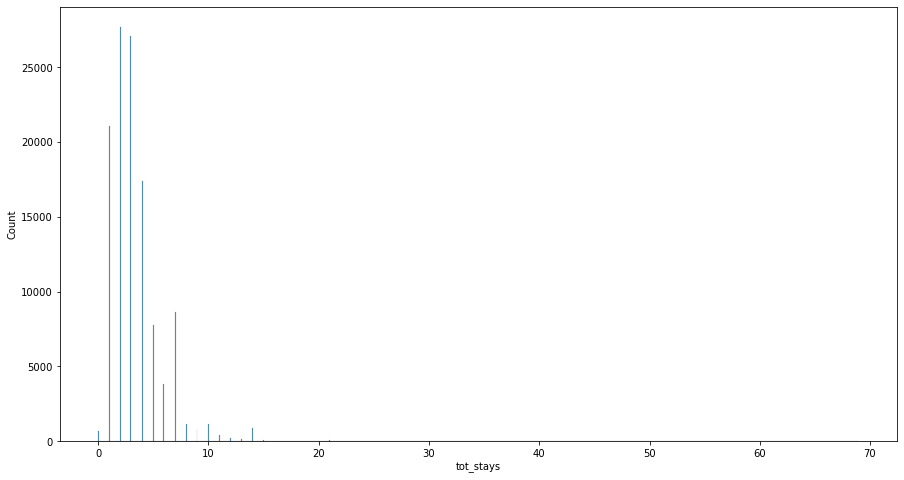

In [61]:
plt.figure(figsize=(15,8))
sns.histplot(da_2['tot_stays']);

In [62]:
def stays_group(total_days):
    if total_days >=14:
        return '14+ days'
    elif total_days >=8:
        return '08-14 days'
    elif total_days >= 1:
        return '01-07 days'
    elif total_days == 0:
        return '0 days'
    else:
        return 'Unknown'

In [63]:
da_2['tot_stays_group'] = da_2['tot_stays'].apply(lambda x: stays_group(x))
da_2.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,tot_stays,tot_stays_group
315,Resort Hotel,1,58,2017,September,29,12,2,5,3,1.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,250.0,0.0,0,Personal,164.57,0,1,Canceled,7,01-07 days
101697,City Hotel,0,59,2018,January,47,14,1,2,2,0.0,0,Breakfast,Kota Yogyakarta,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,28.0,0.0,0,Family,75.00,0,1,Check-Out,3,01-07 days
93050,City Hotel,0,157,2018,September,29,14,0,2,2,1.0,0,Breakfast,Kabupaten Magelang,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Family,121.50,0,1,Check-Out,2,01-07 days
54894,City Hotel,1,28,2018,September,31,29,0,1,2,1.0,0,Breakfast,Kabupaten Gresik,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,119.00,0,0,Canceled,1,01-07 days
43879,City Hotel,0,192,2017,November,39,25,2,3,1,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,6.0,0.0,0,Family,102.00,0,0,Check-Out,5,01-07 days


In [64]:
da_2['tot_stays_group'].value_counts()

01-07 days    113418
08-14 days      3902
14+ days        1355
0 days           715
Name: tot_stays_group, dtype: int64

In [65]:
ins_2_tot_res = da_2.groupby(['hotel','tot_stays_group']).agg({'lead_time':'count'}).reset_index()
ins_2_tot_res.columns = ['hotel','tot_stays_group','total_reservations']
ins_2_tot_res

,hotel,tot_stays_group,total_reservations
0,City Hotel,0 days,331
1,City Hotel,01-07 days,77751
2,City Hotel,08-14 days,986
3,City Hotel,14+ days,262
4,Resort Hotel,0 days,384
5,Resort Hotel,01-07 days,35667
6,Resort Hotel,08-14 days,2916
7,Resort Hotel,14+ days,1093


In [66]:
ins_2 = da_2.groupby(['is_canceled','hotel','tot_stays_group']).agg({'lead_time':'count'}).reset_index()
ins_2.columns = ['is_canceled','hotel','tot_stays_group','reservations']
ins_2

,is_canceled,hotel,tot_stays_group,reservations
0,0,City Hotel,0 days,308
1,0,City Hotel,01-07 days,45348
2,0,City Hotel,08-14 days,499
3,0,City Hotel,14+ days,73
4,0,Resort Hotel,0 days,372
5,0,Resort Hotel,01-07 days,25760
6,0,Resort Hotel,08-14 days,2024
7,0,Resort Hotel,14+ days,782
8,1,City Hotel,0 days,23
9,1,City Hotel,01-07 days,32403


In [67]:
ins_2 = ins_2.merge(ins_2_tot_res, how='inner', on=['hotel','tot_stays_group'])
ins_2

,is_canceled,hotel,tot_stays_group,reservations,total_reservations
0,0,City Hotel,0 days,308,331
1,1,City Hotel,0 days,23,331
2,0,City Hotel,01-07 days,45348,77751
3,1,City Hotel,01-07 days,32403,77751
4,0,City Hotel,08-14 days,499,986
5,1,City Hotel,08-14 days,487,986
6,0,City Hotel,14+ days,73,262
7,1,City Hotel,14+ days,189,262
8,0,Resort Hotel,0 days,372,384
9,1,Resort Hotel,0 days,12,384


In [68]:
ins_2['ratio'] = round(100*ins_2['reservations']/ins_2['total_reservations'],2)
ins_2

,is_canceled,hotel,tot_stays_group,reservations,total_reservations,ratio
0,0,City Hotel,0 days,308,331,93.05
1,1,City Hotel,0 days,23,331,6.95
2,0,City Hotel,01-07 days,45348,77751,58.32
3,1,City Hotel,01-07 days,32403,77751,41.68
4,0,City Hotel,08-14 days,499,986,50.61
5,1,City Hotel,08-14 days,487,986,49.39
6,0,City Hotel,14+ days,73,262,27.86
7,1,City Hotel,14+ days,189,262,72.14
8,0,Resort Hotel,0 days,372,384,96.88
9,1,Resort Hotel,0 days,12,384,3.12


In [69]:
ins_2_final = ins_2[ins_2['is_canceled']==1].reset_index(drop=True)
ins_2_final

,is_canceled,hotel,tot_stays_group,reservations,total_reservations,ratio
0,1,City Hotel,0 days,23,331,6.95
1,1,City Hotel,01-07 days,32403,77751,41.68
2,1,City Hotel,08-14 days,487,986,49.39
3,1,City Hotel,14+ days,189,262,72.14
4,1,Resort Hotel,0 days,12,384,3.12
5,1,Resort Hotel,01-07 days,9907,35667,27.78
6,1,Resort Hotel,08-14 days,892,2916,30.59
7,1,Resort Hotel,14+ days,311,1093,28.45


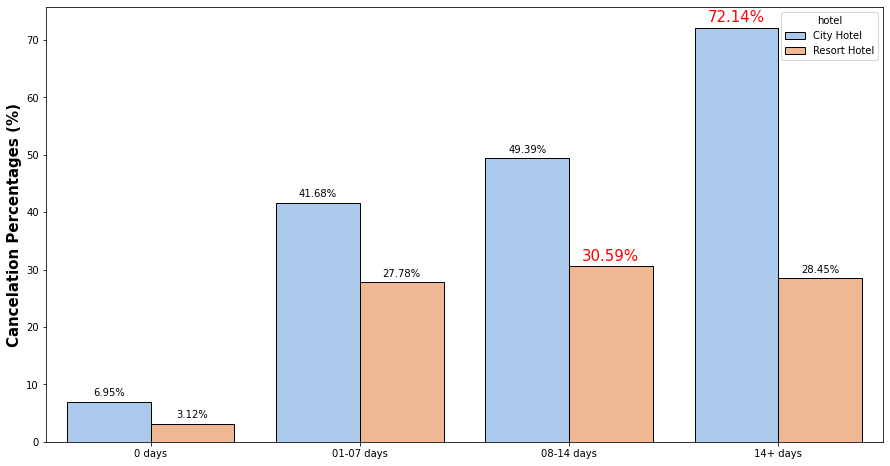

In [74]:
plt.figure(figsize=(15,8))
sns.barplot(data=ins_2_final, x='tot_stays_group', y='ratio', hue='hotel', palette='pastel', edgecolor='black')
plt.xlabel('')
plt.ylabel('Cancelation Percentages (%)', weight='bold', size=15)
for i in range(0,4,1):
    if ins_2_final['ratio'][i] == ins_2_final.iloc[0:5,-1].max():
        plt.text(i - 0.2, ins_2_final['ratio'][i] + 1, '{0}%'.format(ins_2_final['ratio'][i]), ha='center', size = 15, color='red')
    else:
        plt.text(i - 0.2, ins_2_final['ratio'][i] + 1, '{0}%'.format(ins_2_final['ratio'][i]), ha='center')
for i in range(4,8,1):
    if ins_2_final['ratio'][i] == ins_2_final.iloc[5:,-1].max():
        plt.text(i - 4 + 0.2, ins_2_final['ratio'][i] + 1, '{0}%'.format(ins_2_final['ratio'][i]), ha='center', size = 15, color='red')
    else:
        plt.text(i - 4 + 0.2, ins_2_final['ratio'][i] + 1, '{0}%'.format(ins_2_final['ratio'][i]), ha='center')

### Data Analysis 3

In [75]:
da_3 = df_uf.copy()
da_3.sample(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
103864,City Hotel,0,25,2018,February,53,27,1,5,3,0.0,0,Breakfast,Kota Jakarta Barat,Offline TA/TO,TA/TO,0,0,0,1,No Deposit,220.0,0.0,0,Family,87.33,0,0,Check-Out
35297,Resort Hotel,0,28,2019,June,15,11,2,5,2,2.0,0,Dinner,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,0.0,0,Personal,228.00,0,1,Check-Out
61005,City Hotel,1,42,2018,January,49,29,0,3,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,0.0,348.0,0,Personal,90.00,0,0,Canceled
29291,Resort Hotel,0,169,2018,December,43,21,2,2,2,0.0,0,Breakfast,Kota Malang,Online TA,TA/TO,0,0,0,2,No Deposit,240.0,0.0,0,Personal,63.50,0,1,Check-Out
29077,Resort Hotel,0,1,2018,December,43,19,0,1,1,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,314.0,0.0,0,Personal,52.80,0,0,Check-Out


In [76]:
da_3['lead_time'].value_counts().head(30)

0     6345
1     3460
2     2069
3     1816
4     1715
5     1565
6     1445
7     1331
8     1138
12    1079
11    1055
9      992
10     976
14     965
16     942
17     881
15     839
19     839
34     828
18     826
13     821
28     820
20     750
40     722
29     712
22     707
32     690
31     685
21     678
56     676
Name: lead_time, dtype: int64

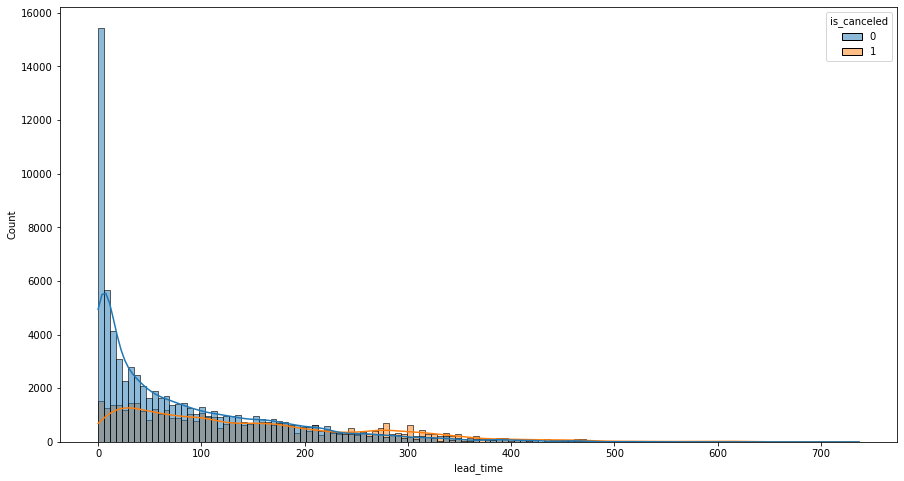

In [77]:
plt.figure(figsize=(15,8))
sns.histplot(data=da_3, x='lead_time',hue='is_canceled',kde=True);

In [78]:
def lead_group(days):
    if days <= 0:
        return 'days (0)'
    elif days <= 90:
        return 'days (001-90)'
    elif days <= 180:
        return 'days (091-180)'
    elif days <= 270:
        return 'days (181-270)'
    elif days <= 365:
        return 'days (271-365)'
    elif days > 365:
        return 'years (1+)'
    else:
        return 'Unknown'

In [79]:
da_3['lead_group'] = da_3['lead_time'].apply(lambda x:lead_group(x))
da_3.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,lead_group
1519,Resort Hotel,1,1,2017,November,36,2,0,2,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,2,No Deposit,240.0,0.0,0,Personal,146.0,0,0,Canceled,days (001-90)
48975,City Hotel,1,79,2018,June,15,3,2,4,2,0.0,0,Breakfast,Kabupaten Sleman,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,0.0,0,Personal,95.2,0,0,Canceled,days (001-90)
5024,Resort Hotel,1,168,2018,June,16,12,0,2,2,0.0,0,Dinner,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,245.0,0.0,0,Personal,86.0,0,0,Canceled,days (091-180)
7422,Resort Hotel,1,113,2018,October,33,8,1,4,2,1.0,0,Dinner,Kota Denpasar,Online TA,TA/TO,0,0,0,1,No Deposit,240.0,0.0,0,Personal,246.5,0,1,Canceled,days (091-180)
59045,City Hotel,1,163,2018,December,43,20,0,3,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,Non Refund,0.0,0.0,0,Personal,100.0,0,0,Canceled,days (091-180)
67190,City Hotel,1,261,2019,June,17,29,2,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,6.0,0.0,183,Personal,90.0,0,0,Canceled,days (181-270)
84312,City Hotel,0,1,2018,April,8,20,2,1,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,138.0,0.0,0,Personal,54.0,0,0,Check-Out,days (001-90)
79085,City Hotel,0,5,2017,December,43,19,1,2,2,0.0,0,Breakfast,Kota Bogor,Offline TA/TO,TA/TO,0,0,0,0,No Deposit,112.0,0.0,0,Family,90.0,0,0,Check-Out,days (001-90)
14540,Resort Hotel,0,0,2017,February,52,21,1,0,2,0.0,0,Breakfast,Kota Denpasar,Direct,Direct,0,0,0,0,No Deposit,0.0,0.0,0,Personal,69.0,1,0,Check-Out,days (0)
66481,City Hotel,1,130,2019,June,16,21,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,286.0,0.0,0,Personal,95.0,0,0,Canceled,days (091-180)


In [80]:
ins_3 = da_3.groupby(['hotel','is_canceled','lead_group']).agg({'lead_time':'count'}).reset_index()
ins_3.columns = ['hotel','is_canceled','lead_group','reservations']
ins_3

,hotel,is_canceled,lead_group,reservations
0,City Hotel,0,days (0),2836
1,City Hotel,0,days (001-90),27824
2,City Hotel,0,days (091-180),9477
3,City Hotel,0,days (181-270),3908
4,City Hotel,0,days (271-365),1402
5,City Hotel,0,years (1+),781
6,City Hotel,1,days (0),273
7,City Hotel,1,days (001-90),13226
8,City Hotel,1,days (091-180),8746
9,City Hotel,1,days (181-270),4315


In [81]:
ins_3_tot_res = da_3.groupby(['hotel','lead_group']).agg({'lead_time':'count'}).reset_index()
ins_3_tot_res.columns = ['hotel','lead_group','reservations']
ins_3_tot_res

,hotel,lead_group,reservations
0,City Hotel,days (0),3109
1,City Hotel,days (001-90),41050
2,City Hotel,days (091-180),18223
3,City Hotel,days (181-270),8223
4,City Hotel,days (271-365),6021
5,City Hotel,years (1+),2704
6,Resort Hotel,days (0),3236
7,Resort Hotel,days (001-90),20864
8,Resort Hotel,days (091-180),8216
9,Resort Hotel,days (181-270),5157


In [82]:
ins_3 = ins_3.merge(ins_3_tot_res, how='inner', on=['hotel','lead_group'])
ins_3.columns = ['hotel','is_canceled','lead_group','reservations','total_reservations']
ins_3['ratio'] = round(100*ins_3['reservations']/ins_3['total_reservations'],2)
ins_3

,hotel,is_canceled,lead_group,reservations,total_reservations,ratio
0,City Hotel,0,days (0),2836,3109,91.22
1,City Hotel,1,days (0),273,3109,8.78
2,City Hotel,0,days (001-90),27824,41050,67.78
3,City Hotel,1,days (001-90),13226,41050,32.22
4,City Hotel,0,days (091-180),9477,18223,52.01
5,City Hotel,1,days (091-180),8746,18223,47.99
6,City Hotel,0,days (181-270),3908,8223,47.53
7,City Hotel,1,days (181-270),4315,8223,52.47
8,City Hotel,0,days (271-365),1402,6021,23.29
9,City Hotel,1,days (271-365),4619,6021,76.71


In [83]:
ins_3_final = ins_3[ins_3['is_canceled']==1].reset_index(drop=True)
ins_3_final

,hotel,is_canceled,lead_group,reservations,total_reservations,ratio
0,City Hotel,1,days (0),273,3109,8.78
1,City Hotel,1,days (001-90),13226,41050,32.22
2,City Hotel,1,days (091-180),8746,18223,47.99
3,City Hotel,1,days (181-270),4315,8223,52.47
4,City Hotel,1,days (271-365),4619,6021,76.71
5,City Hotel,1,years (1+),1923,2704,71.12
6,Resort Hotel,1,days (0),157,3236,4.85
7,Resort Hotel,1,days (001-90),4670,20864,22.38
8,Resort Hotel,1,days (091-180),3075,8216,37.43
9,Resort Hotel,1,days (181-270),2143,5157,41.56


''

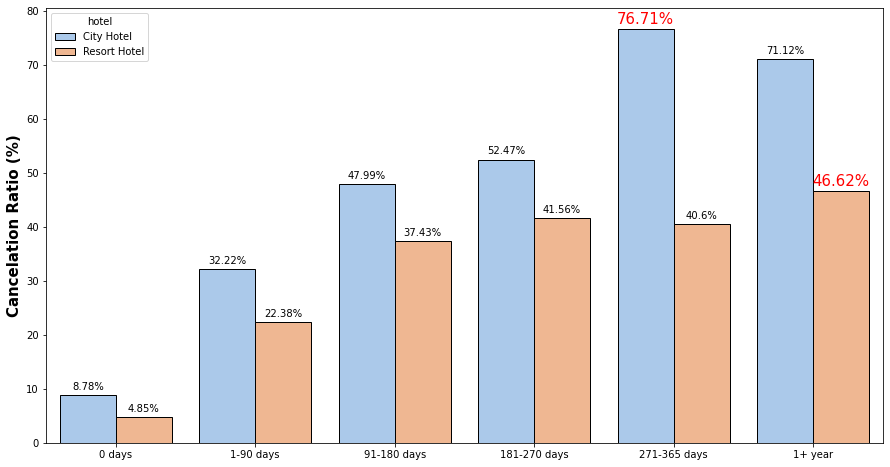

In [90]:
plt.figure(figsize=(15,8))
sns.barplot(data=ins_3_final, x='lead_group', y='ratio', hue='hotel', edgecolor='black', palette='pastel')
plt.ylabel('Cancelation Ratio (%)', size=15, weight='bold')
plt.xlabel('')
plt.xticks(ticks=range(0,6),labels=['0 days', '1-90 days', '91-180 days', '181-270 days', '271-365 days','1+ year'])
for i in range(0,6):
    if ins_3_final['ratio'][i] == ins_3_final.iloc[0:6,-1].max():
        plt.text(i-0.2, ins_3_final['ratio'][i] + 1, '{0}%'.format(ins_3_final['ratio'][i]), ha='center', size=15, color='red')
    else:
        plt.text(i-0.2, ins_3_final['ratio'][i] + 1, '{0}%'.format(ins_3_final['ratio'][i]), ha='center')
for i in range(6,12):
    if ins_3_final['ratio'][i] == ins_3_final.iloc[6:12,-1].max():
        plt.text(i-6+0.2, ins_3_final['ratio'][i] + 1, '{0}%'.format(ins_3_final['ratio'][i]), ha='center', size=15, color='red')
    else:
        plt.text(i-6+0.2, ins_3_final['ratio'][i] + 1, '{0}%'.format(ins_3_final['ratio'][i]), ha='center')
;

In [ ]:
plt.figure(figsize=(20, 20))
sns.heatmap(da_2.corr(), cmap='Blues', annot=True, fmt='.2f');

In [ ]:
cat

In [ ]:
complete_correlation = associations(da_2[['is_canceled','hotel', 'arrival_date_month', 'meal', 'city', 'market_segment', 'distribution_channel', 'deposit_type', 'customer_type', 'reservation_status']],
                                    filename= 'complete_correlation.png', figsize=(10,10))